In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.chdir('/content/drive/My Drive/Datasets')
os.listdir('.')

['iris.csv',
 'heart.csv',
 'pima-indians-diabetes.csv',
 'sonar.csv',
 'housing.csv',
 'auto.csv',
 'winequality-white.csv']

In [3]:
dataset = pd.read_csv('housing.csv')
dataset.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
dataset.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


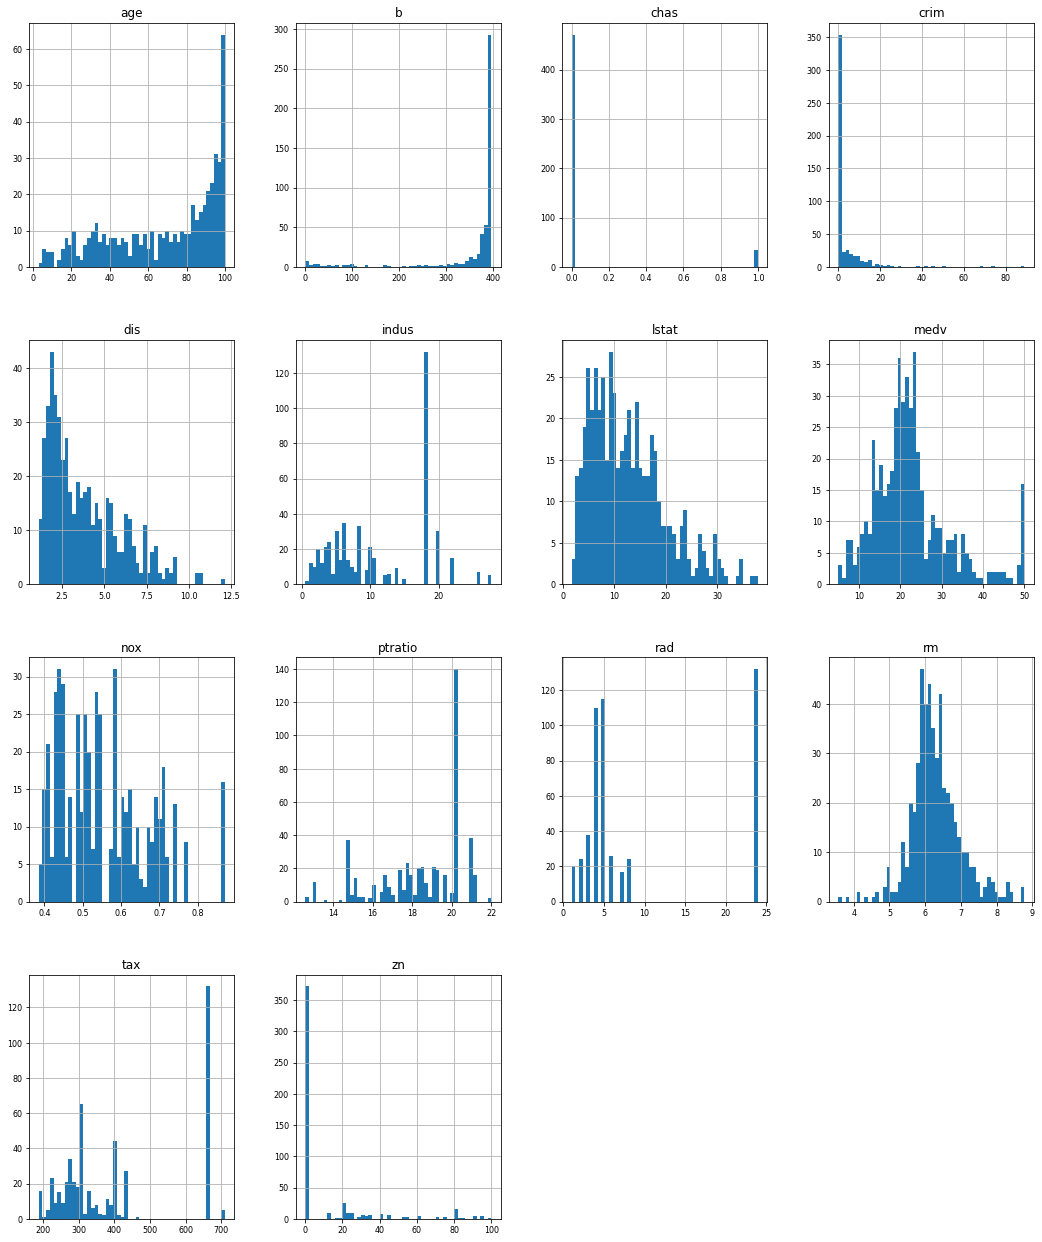

In [ ]:
dataset.hist(figsize=(18, 22), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

<Figure size 1440x864 with 0 Axes>

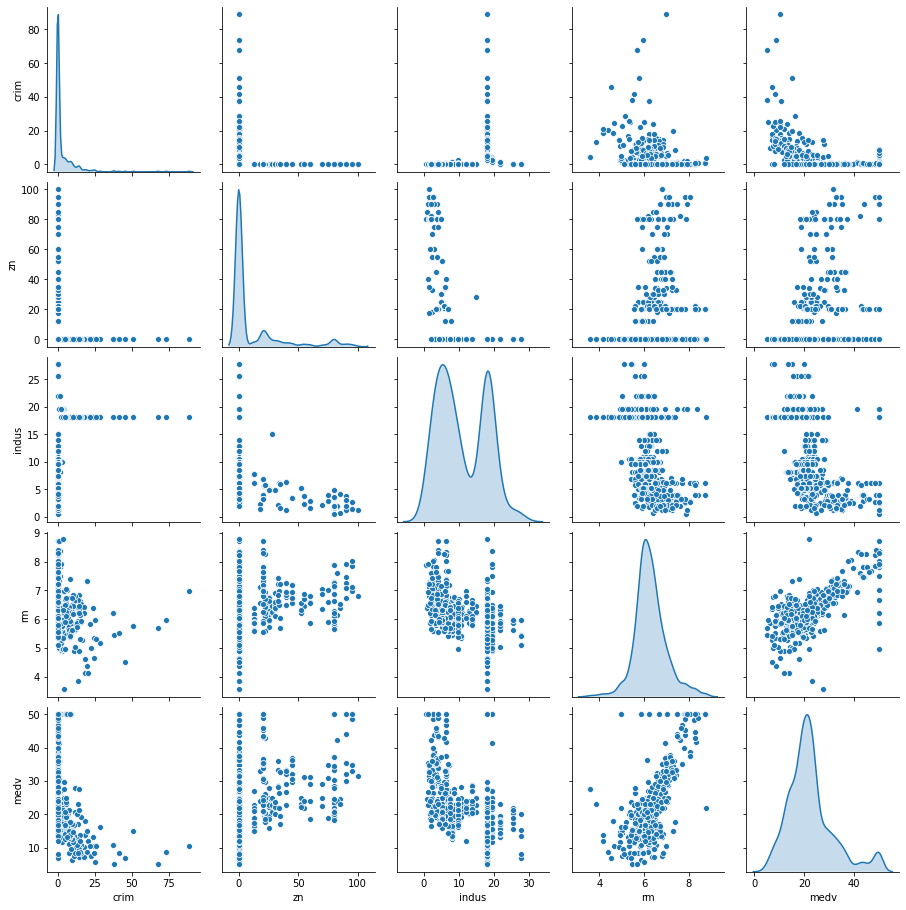

In [ ]:
feat = ['crim','zn','indus','rm', 'medv']
plt.figure(figsize=(20,12))
sb.pairplot(dataset[feat], diag_kind='kde')
plt.show()

In [6]:
# membuat list nama kolom feature
col_feature = dataset.columns[:-1]

# menampilkan data bernilai nol (kosong)
for nama in col_feature:
  print(f'kolom - {nama} - yang berisi nol sebanyak : {len(dataset[dataset[nama] == 0])}')

kolom - crim - yang berisi nol sebanyak : 0
kolom - zn - yang berisi nol sebanyak : 372
kolom - indus - yang berisi nol sebanyak : 0
kolom - chas - yang berisi nol sebanyak : 471
kolom - nox - yang berisi nol sebanyak : 0
kolom - rm - yang berisi nol sebanyak : 0
kolom - age - yang berisi nol sebanyak : 0
kolom - dis - yang berisi nol sebanyak : 0
kolom - rad - yang berisi nol sebanyak : 0
kolom - tax - yang berisi nol sebanyak : 0
kolom - ptratio - yang berisi nol sebanyak : 0
kolom - b - yang berisi nol sebanyak : 0
kolom - lstat - yang berisi nol sebanyak : 0


In [7]:
dataset.zn.value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: zn, dtype: int64

In [8]:
dataset.chas.value_counts()

0    471
1     35
Name: chas, dtype: int64

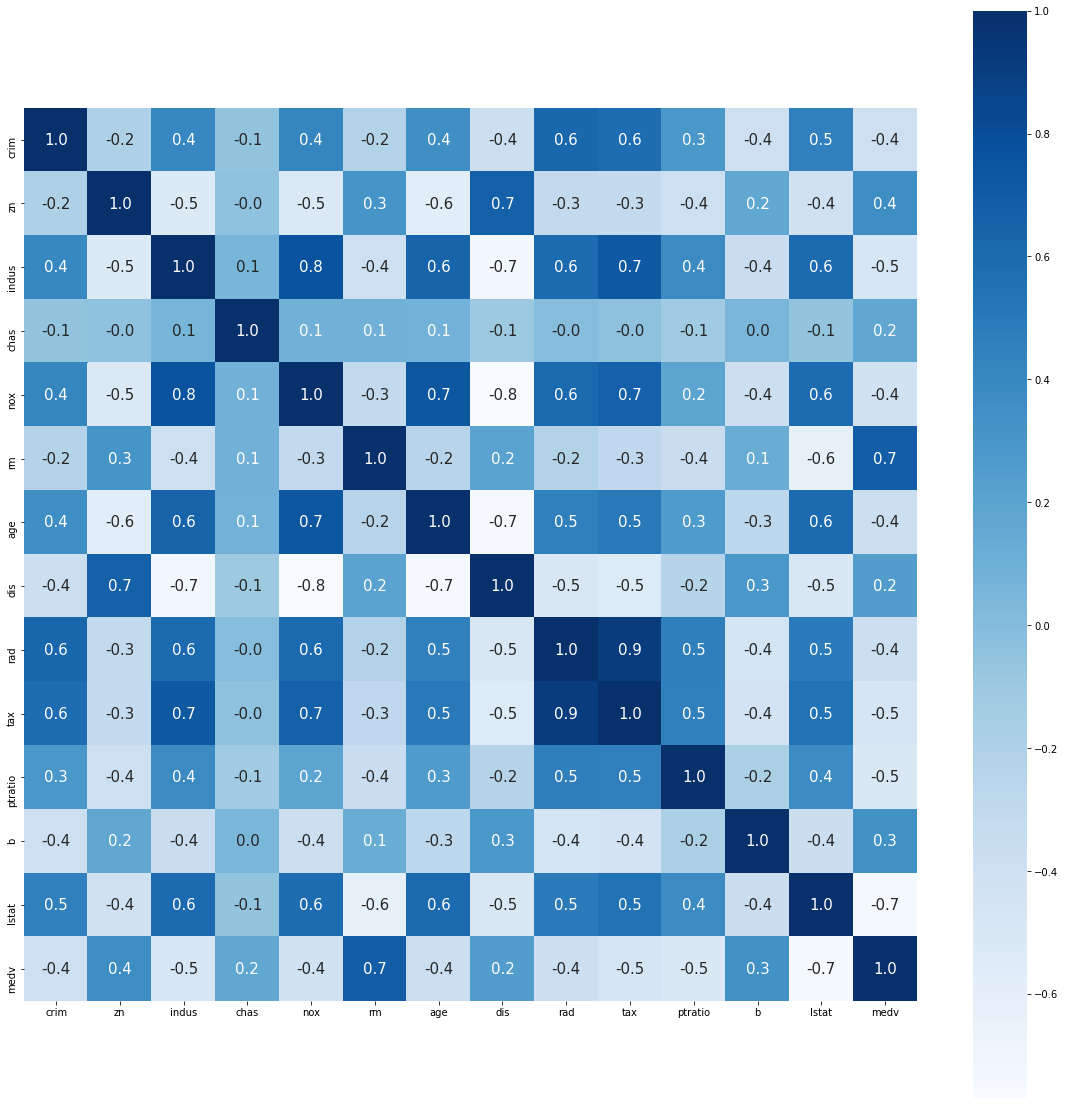

In [ ]:
# memvisualisasikan korelasi data
corr = dataset.corr()

plt.figure(figsize=(20,20))
sb.heatmap(corr, annot=True, cbar=True, square= True, fmt='.1f', annot_kws={'size':15}, cmap='Blues')
plt.show()

In [9]:
# membagi data feature dan label
feature = dataset.drop(['medv'], axis=1)
label = dataset['medv']

# Assignment 8

**Untuk dataset**: Boston Housing, Wine Quality, & Automobile

1. Lakukan preprocessing terhadap data menggunakan:
  - StandardScaler
  - Yeo-Johnson (PowerTransformer)
  - Box-Cox Transformation (PowerTransformer)
  - QuantileTransformer
  - MinMaxScaler
  - MaxAbsScaler
  - RobustScaler

  Dan jelaskan apabila hasil training untuk algoritma LinearRegression untuk masing-masing metode transformasi data dibandingkan!

  Jelaskan juga apabila terdapat metode preprocessing yang tidak dapat digunakan untuk salah satu dataset!

  **Catatan**: Ratio training set: testing set = 75:25, dengan random_state=10

2. Gunakan algoritma berikut dan lakukan percobaan hyperparameter tuning untuk mendapatkan hasil terbaik:
  - Random Forest Regressor
  - XGBoost
  - SVM Regressor
  - KNN Regressor

  Hitung angka r^2 serta RMSE untuk menentukan mana algoritma yang paling baik!

  **Catatan**: Ratio training set: testing set = 75:25, dengan random_state=10

# Jawaban No. 1

## Preprocessing

In [10]:
# melakukan scalling dan membagi feture dan label
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

standard_scaler = preprocessing.StandardScaler() 
power_transformer_yj = preprocessing.PowerTransformer(method='yeo-johnson') 
power_transformer_bc = preprocessing.PowerTransformer(method='box-cox')
quantile_transformer = preprocessing.QuantileTransformer()
min_max_scaler = preprocessing.MinMaxScaler()
max_abs_scaler = preprocessing.MaxAbsScaler()
robust_scaler = preprocessing.RobustScaler()

scalling =[standard_scaler, power_transformer_yj, power_transformer_bc,
           quantile_transformer, min_max_scaler, max_abs_scaler, robust_scaler]

feature_train = []
feature_test = []
label_train = []
label_test = []

for scaler in scalling:
  try:
    feature_scaled = scaler.fit_transform(feature.values)
    label_scaled = scaler.fit_transform(label.values.reshape(-1,1)).flatten()
    x_train, x_test, y_train, y_test = train_test_split(feature_scaled, label_scaled, test_size=0.25, random_state=10)
    feature_train.append(x_train)
    feature_test.append(x_test)
    label_train.append(y_train)
    label_test.append(y_test)

  except:
    # melihat scalling yang tidak dapat digunakan
    print('Error terjadi pada: ', scaler)
    print('Karene tidak dapat mengoleh data yang bernilai minus')
    print('\n')
    pass

Error terjadi pada:  PowerTransformer(copy=True, method='box-cox', standardize=True)
Karene tidak dapat mengoleh data yang bernilai minus




/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


## Melatih Model dan Evaluasi

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr_model = LinearRegression()

# list scalling yang bisa digunakan
scalling_use =['standard_scaler', 'power_transformer_yj', 'quantile_transformer', 
           'min_max_scaler', 'max_abs_scaler', 'robust_scaler']

for i in range(6):  
  lr_model.fit(feature_train[i], label_train[i])

  # prediksi
  feature_train_pred = lr_model.predict(feature_train[i])
  feature_test_pred = lr_model.predict(feature_test[i])

  # evaluasi
  score_x = r2_score(label_train[i], feature_train_pred)
  score_y = r2_score(label_test[i], feature_test_pred)
  rmse_x = np.sqrt(mean_squared_error(label_train[i], feature_train_pred))
  rmse_y = np.sqrt(mean_squared_error(label_test[i], feature_test_pred))


  print('Berikut hasil evaluasi dengan scalling: ', scalling_use[i])
  print('- Nilai r2_score train \t:', round(score_x, 2))
  print('- Nilai r2_score test \t:', round(score_y, 2))
  print('- Nilai RMSE train \t:', round(rmse_x, 2))
  print('- Nilai RMSE test \t:', round(rmse_y, 2))
  print('\n')

Berikut hasil evaluasi dengan scalling:  standard_scaler
- Nilai r2_score train 	: 0.76
- Nilai r2_score test 	: 0.67
- Nilai RMSE train 	: 0.47
- Nilai RMSE test 	: 0.62


Berikut hasil evaluasi dengan scalling:  power_transformer_yj
- Nilai r2_score train 	: 0.77
- Nilai r2_score test 	: 0.77
- Nilai RMSE train 	: 0.47
- Nilai RMSE test 	: 0.49


Berikut hasil evaluasi dengan scalling:  quantile_transformer
- Nilai r2_score train 	: 0.81
- Nilai r2_score test 	: 0.77
- Nilai RMSE train 	: 0.13
- Nilai RMSE test 	: 0.14


Berikut hasil evaluasi dengan scalling:  min_max_scaler
- Nilai r2_score train 	: 0.76
- Nilai r2_score test 	: 0.67
- Nilai RMSE train 	: 0.1
- Nilai RMSE test 	: 0.13


Berikut hasil evaluasi dengan scalling:  max_abs_scaler
- Nilai r2_score train 	: 0.76
- Nilai r2_score test 	: 0.67
- Nilai RMSE train 	: 0.09
- Nilai RMSE test 	: 0.11


Berikut hasil evaluasi dengan scalling:  robust_scaler
- Nilai r2_score train 	: 0.76
- Nilai r2_score test 	: 0.67
- Nilai RMSE

## Kesimpulan:
- Ada satu tipe scalling yang tidak dapat digunakan yaitu **PowerTransformer(method=box-cox)** karena jenis ini tidak dapat mengolah data yang ada bernilai minus atau nol dan hanya bekerja dengan nilai-nilai yang sangat positif. Sedangkan pada data housing ini memiliki nilai nol pada kolom *chas* dan *zn* sehingga scalling ini tidak dapat digunakan.
- Dengan menggunakan algoritma **LinearRegression** dengan berbagai type scalling yang digunakan dapat diketahui bahwa dengan tipe scalling **QuantileTransformer** yang memiliki nilai r2_score yang tinggi antara data train dan data testnya (r2_score train = 0.81 dan r2_score test = 0.77) serta memiliki nilai RMSE yang juga termasuk rendah (RMSE train = 0.13 dan RMSE test = 0.14)

# Jawaban No. 2

## Preprocessing

## RandomForestRegressor dengan Scalling Quantile Transformer

In [20]:
# melakukan preprocessing dan pembagian data train dan test
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

# scalling
scaler = QuantileTransformer()
feature_scaled = scaler.fit_transform(feature.values)
label_scaled = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

# membagi data train dan test
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.25, random_state=10)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (506). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


In [21]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators=3000, max_features='auto', max_depth=10)
rfr_model.fit(feature_train, label_train)

# prediksi
train_pred = rfr_model.predict(feature_train)
test_pred = rfr_model.predict(feature_test)

# melakukan scoring r2_score dan RMSE
score_train = r2_score(label_train, train_pred)
score_test = r2_score(label_test, test_pred)
rmse_train = np.sqrt(mean_squared_error(label_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(label_test, test_pred))

# mencetak nilai r2_score dan RMSE
print('- Nilai r2_score train \t:', round(score_train, 2))
print('- Nilai r2_score test \t:', round(score_test, 2))
print('- Nilai RMSE train \t:', round(rmse_train, 2))
print('- Nilai RMSE test \t:', round(rmse_test, 2))

- Nilai r2_score train 	: 0.98
- Nilai r2_score test 	: 0.81
- Nilai RMSE train 	: 0.04
- Nilai RMSE test 	: 0.13


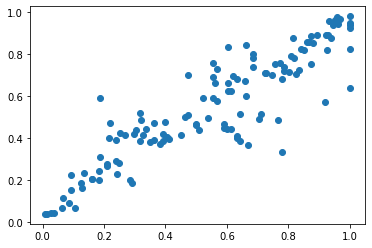

In [22]:
plt.scatter(label_test, test_pred)
plt.show()

## Random Forest Regressor dengan Scalling Power Transformer

In [23]:
# melakukan preprocessing dan pembagian data train dan test
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

# scalling
scaler = PowerTransformer(method='yeo-johnson')
feature_scaled = scaler.fit_transform(feature.values)
label_scaled = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

# membagi data train dan test
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.25, random_state=10)

In [24]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor(n_estimators=3000, max_features='auto', max_depth=10)
rfr_model.fit(feature_train, label_train)

# prediksi
train_pred = rfr_model.predict(feature_train)
test_pred = rfr_model.predict(feature_test)

# melakukan scoring r2_score dan RMSE
score_train = r2_score(label_train, train_pred)
score_test = r2_score(label_test, test_pred)
rmse_train = np.sqrt(mean_squared_error(label_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(label_test, test_pred))

# mencetak nilai r2_score dan RMSE
print('- Nilai r2_score train \t:', round(score_train, 2))
print('- Nilai r2_score test \t:', round(score_test, 2))
print('- Nilai RMSE train \t:', round(rmse_train, 2))
print('- Nilai RMSE test \t:', round(rmse_test, 2))

- Nilai r2_score train 	: 0.98
- Nilai r2_score test 	: 0.86
- Nilai RMSE train 	: 0.15
- Nilai RMSE test 	: 0.38


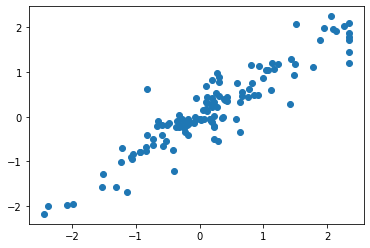

In [25]:
plt.scatter(label_test, test_pred)
plt.show()

## XGBoost dengan Scalling Power Transformer

In [26]:
# melatih dataset dengan algoritma xgboost
from sklearn.metrics import r2_score, mean_squared_error
import xgboost as xgb
xgbr_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, eta=0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 5, n_estimators = 500)
xgbr_model.fit(feature_train, label_train)

# prediksi
train_pred = xgbr_model.predict(feature_train)
test_pred = xgbr_model.predict(feature_test)

# melakukan scoring r2_score dan RMSE
score_train = r2_score(label_train, train_pred)
score_test = r2_score(label_test, test_pred)
rmse_train = np.sqrt(mean_squared_error(label_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(label_test, test_pred))

# mencetak nilai r2_score dan RMSE
print('- Nilai r2_score train \t:', round(score_train, 2))
print('- Nilai r2_score test \t:', round(score_test, 2))
print('- Nilai RMSE train \t:', round(rmse_train, 2))
print('- Nilai RMSE test \t:', round(rmse_test, 2))

- Nilai r2_score train 	: 1.0
- Nilai r2_score test 	: 0.88
- Nilai RMSE train 	: 0.0
- Nilai RMSE test 	: 0.35


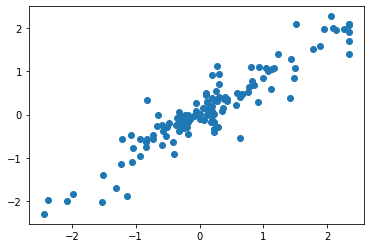

In [28]:
plt.scatter(label_test, test_pred)
plt.show()

## SVM Regressor dengan Scalling Power Transformer

In [29]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', gamma='scale', C=10)
svr_model.fit(feature_train, label_train)

# prediksi
train_pred = svr_model.predict(feature_train)
test_pred = svr_model.predict(feature_test)

# melakukan scoring r2_score dan RMSE
score_train = r2_score(label_train, train_pred)
score_test = r2_score(label_test, test_pred)
rmse_train = np.sqrt(mean_squared_error(label_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(label_test, test_pred))

# mencetak nilai r2_score dan RMSE
print('- Nilai r2_score train \t:', round(score_train, 2))
print('- Nilai r2_score test \t:', round(score_test, 2))
print('- Nilai RMSE train \t:', round(rmse_train, 2))
print('- Nilai RMSE test \t:', round(rmse_test, 2))

- Nilai r2_score train 	: 0.95
- Nilai r2_score test 	: 0.88
- Nilai RMSE train 	: 0.23
- Nilai RMSE test 	: 0.34


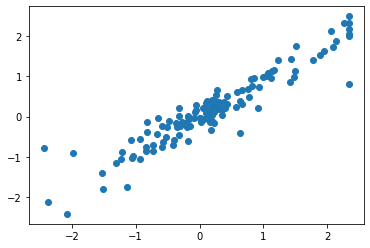

In [30]:
plt.scatter(label_test, test_pred)
plt.show()

## KNN Regressor dengan Scalling Power Transformer

In [31]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5, weights='distance', algorithm='auto')
knn_model.fit(feature_train, label_train)

# prediksi
train_pred = knn_model.predict(feature_train)
test_pred = knn_model.predict(feature_test)

# melakukan scoring r2_score dan RMSE
score_train = r2_score(label_train, train_pred)
score_test = r2_score(label_test, test_pred)
rmse_train = np.sqrt(mean_squared_error(label_train, train_pred))
rmse_test = np.sqrt(mean_squared_error(label_test, test_pred))

# mencetak nilai r2_score dan RMSE
print('- Nilai r2_score train \t:', round(score_train, 2))
print('- Nilai r2_score test \t:', round(score_test, 2))
print('- Nilai RMSE train \t:', round(rmse_train, 2))
print('- Nilai RMSE test \t:', round(rmse_test, 2))

- Nilai r2_score train 	: 1.0
- Nilai r2_score test 	: 0.79
- Nilai RMSE train 	: 0.0
- Nilai RMSE test 	: 0.47


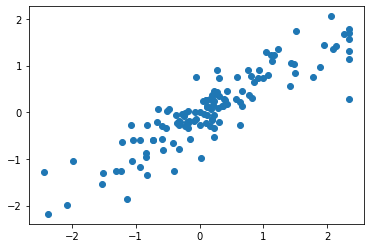

In [32]:
plt.scatter(label_test, test_pred)
plt.show()

## Kesimpulan:
- Algoritma diatas sudah saya pilih yang terbaik dari tuning parameternya.
- Pada tahap preprocesing saya menggunakan scalling PowerTransformer karena memiliki nilai r2_score yng lebih baik dibanding yang lain meskipun pada kasus no. 1 yang terbaik yaitu Quantile Transformer. keunggulan Quartile transformer ini terletak pada nilai RMSE yang kecil dibandingkan Standard Scaler dan Power Transformer.
- Penggunaan preprocessing yang cocok juga disesuaikan dengan model algoritma yang digunakan, perbandingannya dapat dilihat pada contoh diatas (RandomForestRegressor dengan Quantile Transformer dan Power Transformer 'yoe johson) dan hasil yang terbaik dengan Power Transformer 'yoe johnson'.
- Dari keempat algoritma yang diterapkan, berdasarkan hasil evaluasi yang saya lakukan maka algoritma pertama yang paling cocok pada masalah ini yaitu *SVM Regressor* karena hasil r2_score data training (0.95) dan data testing (0.88) tidak terlalu jauh variancenya (0.07) sehingga prediksinya tidak terlalu overfitting atau dapat dikatakan hasilnya lumayan bagus
- Algoritma yang terbaik selanjutnya yaitu Random Forest Regressor (r2_sore train = 0.98 dan r2_score test = 0.86) dan XGboost reg (r2_sore train = 1.0 dan r2_score test = 0.88), kedu algoritma ini memiliki varience yang lebih besar sedikit yaitu 0.12, sehingga agak mendekati overfitting dibandingkan SVR.
- Pada Algoritma KNN Regressor terlihat menghasilkan prediksi yang mendekati overfitting dengan nilai r2_score data training yang sempurna (1.0) sedangkan nilai r2_score data testingnya masih memiliki variance yng lumayan tinggi yaitu 0.21 atau dengan nilai r2_score 0.79.
